## imported Libraries 

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

#### Shpefile of egypt from Natural Earth (https://gadm.org/index.html)

In [2]:
egypt = gpd.read_file('gadm41_EGY_1.json')   # Read the shapefile

<Axes: >

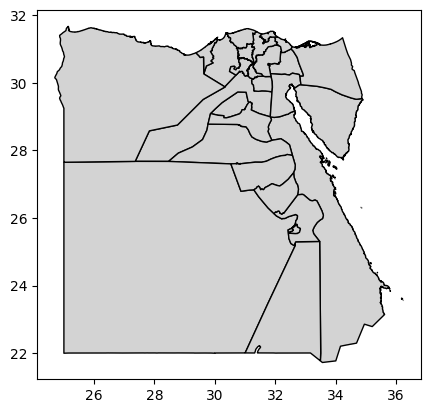

In [9]:
egypt.plot(color='lightgrey', edgecolor='black')  # Plot the governorate polygons

#### inserting each governorate name on the map 

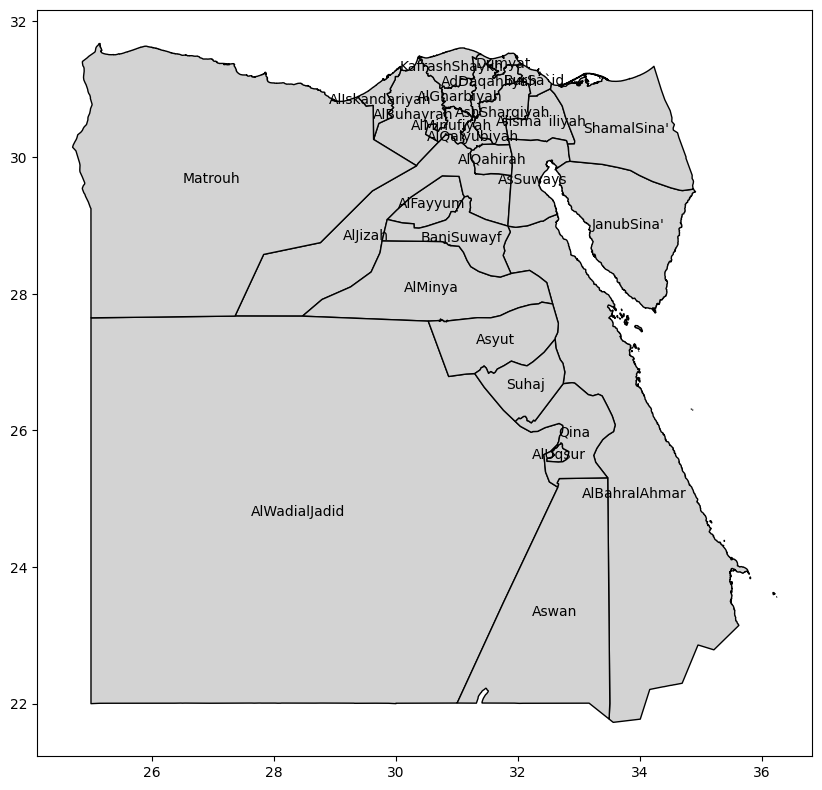

In [5]:
# Set the desired width and height of the figure
width = 10
height = 10

# Create a new figure and axis with the custom size
fig, ax = plt.subplots(figsize=(width, height))

# Plot the governorate polygons
egypt.plot(ax=ax, color='lightgray', edgecolor='black')

# Add labels for governorate names
for idx, row in egypt.iterrows():
    centroid = row['geometry'].centroid
    governorate_name = row['NAME_1']
    ax.text(centroid.x, centroid.y, governorate_name,
            ha='center', va='center')


In [6]:
# Create a dictionary to store governorates and their neighbors
governorates_dict = {}

# Iterate over each governorate
for idx, row in egypt.iterrows():
    governorate_name = row['NAME_1']
    neighbors = []
    
    # Iterate over neighboring governorates
    for neighbor_idx, neighbor_row in egypt.iterrows():
        neighbor_name = neighbor_row['NAME_1']
        
        # Skip if it's the same governorate
        if neighbor_name == governorate_name:
            continue
        
        # Check if the geometries intersect (neighbors)
        if row['geometry'].intersects(neighbor_row['geometry']):
            neighbors.append(neighbor_name)
    
    # Add governorate and its neighbors to the dictionary
    governorates_dict[governorate_name] = neighbors

# Print the dictionary
for governorate, neighbors in governorates_dict.items():
    print(governorate, neighbors)


# Define colors
colors = ["red", "green", "blue", "yellow"]

# Define the function to check constraints
def check_constraints(state, color, assignment):
    for neighbor in governorates_dict[state]:
        if neighbor in assignment and assignment[neighbor] == color:
            return False
    return True

def backtracking_search(assignment):
    if len(assignment) == len(governorates_dict):
        return assignment
    unassigned_states = [state for state in governorates_dict if state not in assignment]
    first_unassigned_state = unassigned_states[0]
    for color in colors:
        if check_constraints(first_unassigned_state, color, assignment):
            assignment[first_unassigned_state] = color
            result = backtracking_search(assignment)
            if result is not None:
                return result
            del assignment[first_unassigned_state]
    return None

# Solve the problem
solution = backtracking_search({})
print(solution)

AdDaqahliyah ['AlGharbiyah', 'AlQalyubiyah', 'AshSharqiyah', 'BurSa`id', 'Dumyat', 'KafrashShaykh']
AlBahralAhmar ['AlJizah', 'AlMinya', 'AsSuways', 'Aswan', 'Asyut', 'BaniSuwayf', 'Qina', 'Suhaj']
AlBuhayrah ['AlGharbiyah', 'AlIskandariyah', 'AlJizah', 'AlMinufiyah', 'KafrashShaykh', 'Matrouh']
AlFayyum ['AlJizah', 'BaniSuwayf']
AlGharbiyah ['AdDaqahliyah', 'AlBuhayrah', 'AlMinufiyah', 'AlQalyubiyah', 'KafrashShaykh']
AlIskandariyah ['AlBuhayrah', 'Matrouh']
AlIsma`iliyah ['AsSuways', 'AshSharqiyah', 'BurSa`id', "ShamalSina'"]
AlJizah ['AlBahralAhmar', 'AlBuhayrah', 'AlFayyum', 'AlMinufiyah', 'AlMinya', 'AlQahirah', 'AlQalyubiyah', 'AlWadialJadid', 'AsSuways', 'BaniSuwayf', 'Matrouh']
AlMinufiyah ['AlBuhayrah', 'AlGharbiyah', 'AlJizah', 'AlQalyubiyah']
AlMinya ['AlBahralAhmar', 'AlJizah', 'AlWadialJadid', 'Asyut', 'BaniSuwayf']
AlQahirah ['AlJizah', 'AlQalyubiyah', 'AsSuways', 'AshSharqiyah']
AlQalyubiyah ['AdDaqahliyah', 'AlGharbiyah', 'AlJizah', 'AlMinufiyah', 'AlQahirah', 'AshSharq

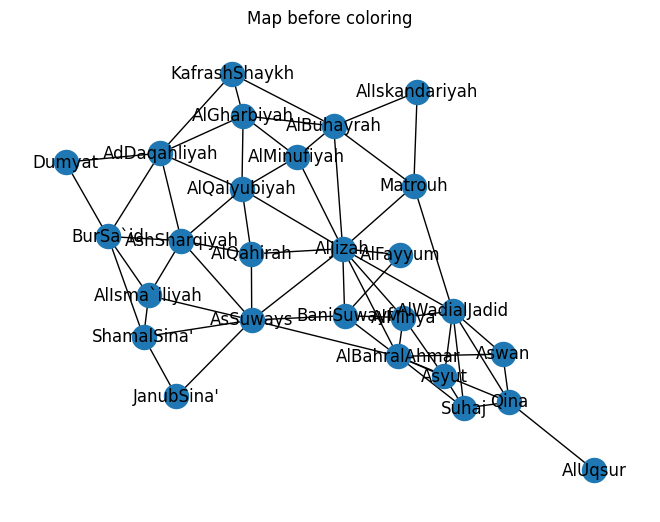

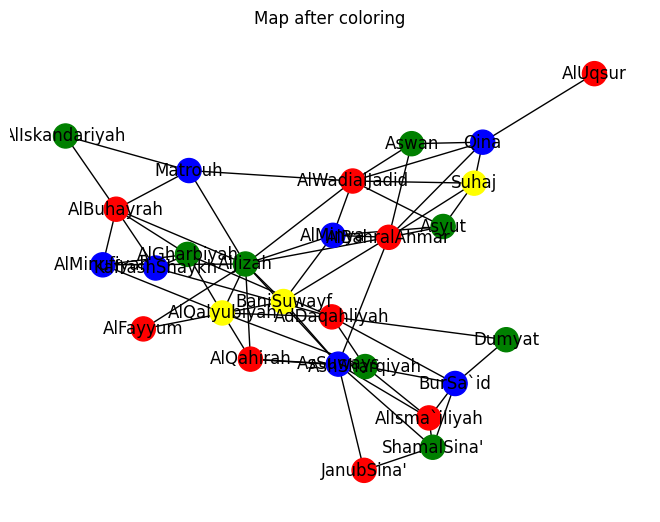

In [7]:
import networkx as nx
# Create the networkx graph using the governorates dictionary
G = nx.Graph(governorates_dict)

# Draw the graph before coloring
nx.draw(G, with_labels=True)
plt.title("Map before coloring")
plt.show()

# Color the nodes based on the solution
color_map = [solution[state] for state in G.nodes()]

# Draw the graph after coloring
nx.draw(G, node_color=color_map, with_labels=True)
plt.title("Map after coloring")
plt.show()


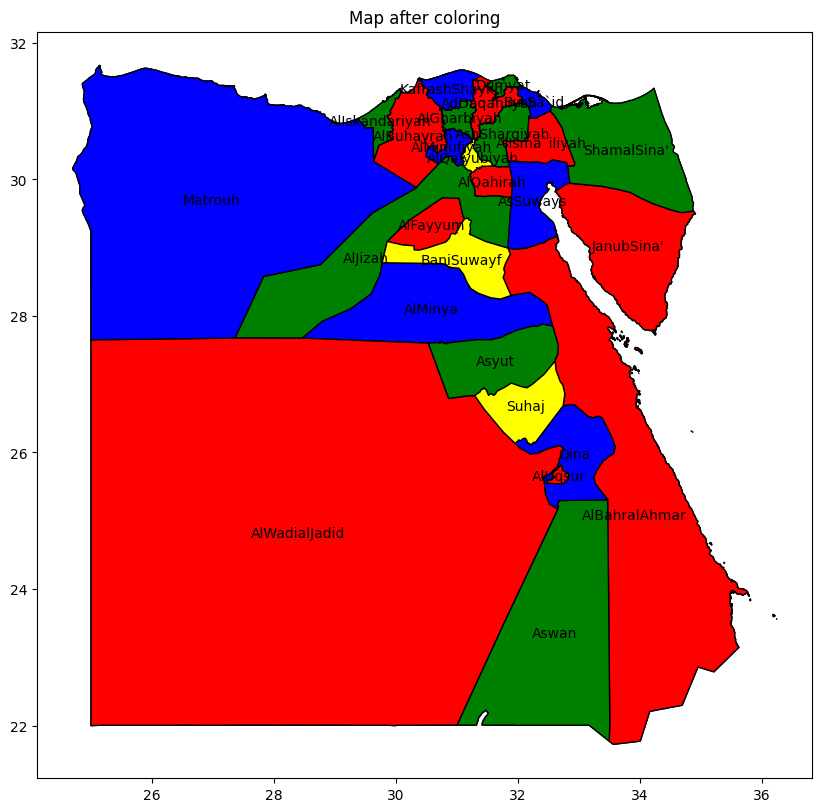

In [8]:
# Set the desired width and height of the figure
width = 10
height = 10

# Create a new figure and axis with the custom size
fig, ax = plt.subplots(figsize=(width, height))

# Plot the governorate polygons with default colors
egypt.plot(ax=ax, color='lightgray', edgecolor='black')

# Add labels for governorate names
for idx, row in egypt.iterrows():
    centroid = row['geometry'].centroid
    governorate_name = row['NAME_1']
    ax.text(centroid.x, centroid.y, governorate_name, ha='center', va='center')

# Color the governorate polygons based on the solution
for idx, row in egypt.iterrows():
    governorate_name = row['NAME_1']
    color = solution.get(governorate_name, 'gray')  # Default color is gray if not assigned
    egypt.loc[egypt['NAME_1'] == governorate_name, 'color'] = color

# Plot the colored map
egypt.plot(ax=ax, color=egypt['color'], edgecolor='black')

# Set the title
plt.title("Map after coloring")
# Show the plot
plt.show()
